<a href="https://colab.research.google.com/github/priyanships31/ipl-t20-cricket-analysis/blob/main/Priyanshi_Singh_24_02_2021_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [8]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading data from the csvs

In [10]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/teams.csv'
teams_df=pd.read_csv(file_path)

In [11]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/deliveries.csv'
deliveries_df=pd.read_csv(file_path)

In [12]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/matches.csv'
matches_df=pd.read_csv(file_path)
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/teamwise_home_and_away.csv'
teamwise_home_and_away_df=pd.read_csv(file_path)

In [15]:
teamwise_home_and_away_df.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [16]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/most_runs_average_strikerate.csv'
most_runs_average_strikerate_df=pd.read_csv(file_path)

In [17]:
most_runs_average_strikerate_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [18]:
file_path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project/IPL T20 Cricket Analysis/IPL Data/Players.xlsx'
players_df=pd.read_excel(file_path)

In [19]:
players_df.columns

Index(['Player_Name', 'DOB', 'Batting_Hand', 'Bowling_Skill', 'Country'], dtype='object')

### Results for different teams in playing in IPL

In [89]:
matches_df = matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants') # error in dataframe name 
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Rising Pune Supergiant','Rising Pune Supergiants')  


In [90]:
# Replacing old team names with new team names
matches_df = matches_df.replace('Pune Warriors','Rising Pune Supergiants')
matches_df = matches_df.replace('Delhi Daredevils','Delhi Capitals')
matches_df = matches_df.replace('Deccan Chargers','Sunrisers Hyderabad')
# matches_df['toss_winner'].unique()
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Pune Warriors','Rising Pune Supergiants')
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Delhi Daredevils','Delhi Capitals')
teamwise_home_and_away_df = teamwise_home_and_away_df.replace('Deccan Chargers','Sunrisers Hyderabad')


In [91]:
# creating a column for season year
matches_df[['year']] = matches_df['Season'].str.split('-',expand = True)[1]
matches_df['year'] = matches_df['year'].astype(int)

###Top Five venues of IPL matches




In [114]:
venue_of_matches = pd.DataFrame(matches_df["venue"].value_counts())
venue_of_matches.reset_index(level = 0, inplace = True)
venue_of_matches.columns= ['venue','number of matches']

# top 5 venues
venue_of_matches.iloc[:5]

,venue,number of matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


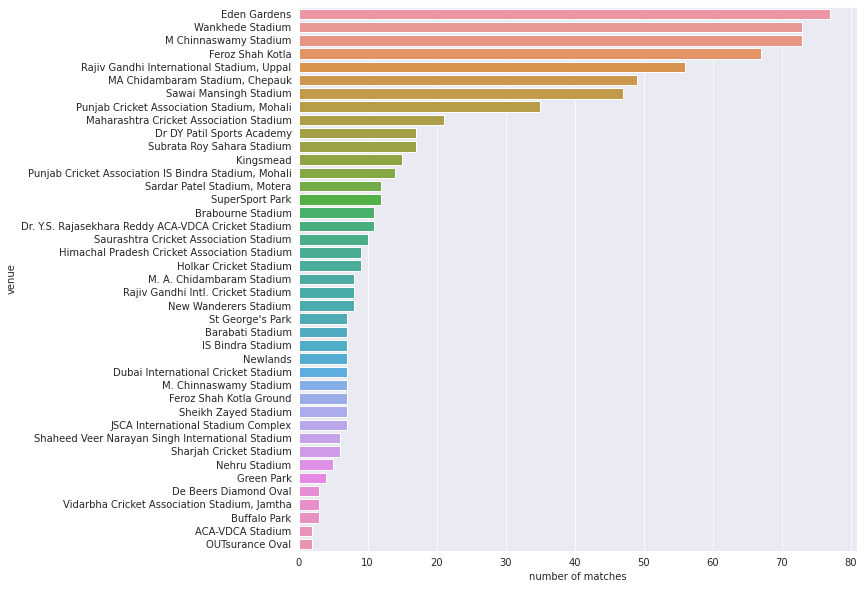

In [117]:
# Visual representation of IPL seasons and venue of matches
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(venue_of_matches["number of matches"],venue_of_matches["venue"],ax=ax, data=number_of_matches)
plt.show()

*Eden Gardens is the Top venue for IPL matches..*

### Which season had the most number of IPL matches

In [92]:
number_of_matches = pd.DataFrame(matches_df["Season"].value_counts())
number_of_matches.reset_index(level = 0, inplace = True)
number_of_matches.columns= ['season','number of matches']
number_of_matches



,season,number of matches
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2018,60
4,IPL-2010,60
5,IPL-2016,60
6,IPL-2014,60
7,IPL-2019,60
8,IPL-2017,59
9,IPL-2015,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


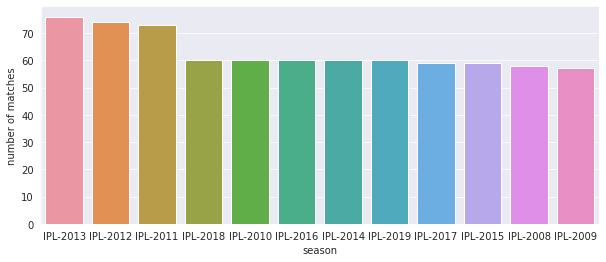

In [93]:
# Visual representation of IPL seasons and number of matches
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('darkgrid')
sns.barplot(number_of_matches["season"],number_of_matches["number of matches"],ax=ax, data=number_of_matches)
plt.show()

*The IPL seasons 2011 ,2012 and 2013 have a relatively higer number of matches than rest of the seasons*

In [94]:
# IPL-2013 had the most number of matches
matches_df[matches_df['Season'] == 'IPL-2013']['result'].value_counts() 

normal    74
tie        2
Name: result, dtype: int64

###  Player who was Player of the match of highest number of times 

In [95]:

matches_df['player_of_match'].value_counts()  # CH Gayle has been Man of the Match for the most time

CH Gayle           21
AB de Villiers     20
RG Sharma          17
MS Dhoni           17
DA Warner          17
                   ..
RA Tripathi         1
DL Vettori          1
KK Cooper           1
S Anirudha          1
AA Jhunjhunwala     1
Name: player_of_match, Length: 226, dtype: int64

In [96]:
matches_df[matches_df['player_of_match'] == 'CH Gayle']['winner'].value_counts() 

Royal Challengers Bangalore    17
Kings XI Punjab                 3
Kolkata Knight Riders           1
Name: winner, dtype: int64

### Number of Toss wins by each team

In [97]:
toss_winner = pd.DataFrame(matches_df['toss_winner'].value_counts())
toss_winner.columns = ['Number of tosses won']
toss_winner.reset_index(level = 0,inplace = True)
toss_winner.columns = ['Teams','Number of tosses won']
toss_winner


,Teams,Number of tosses won
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Delhi Capitals,90
3,Sunrisers Hyderabad,89
4,Chennai Super Kings,89
5,Royal Challengers Bangalore,81
6,Kings XI Punjab,81
7,Rajasthan Royals,80
8,Rising Pune Supergiants,33
9,Gujarat Lions,15


Text(0.5, 0, 'Number of tosses won')

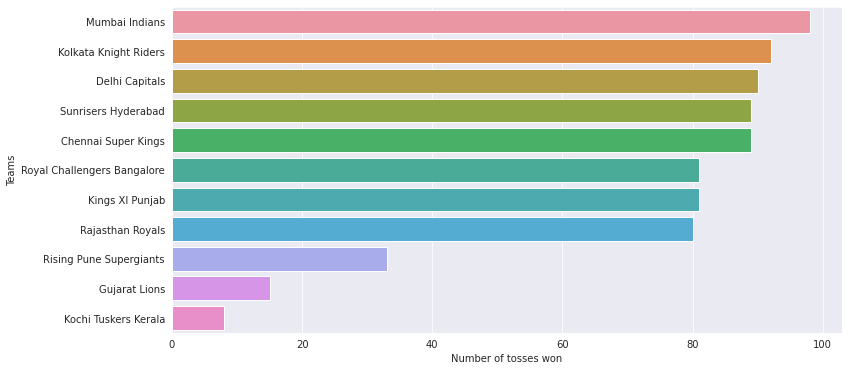

In [98]:
# Visual representaion of Teams vs number of tosses won
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x='Number of tosses won', y='Teams', ax=ax,data=toss_winner)
ax.set_xlabel('Number of tosses won')

*Mumbai Indians won the highest number of tosses while Kochi Tuskers the least*


### Winner Team in each season

In [99]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets,year
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529,2013.444444
std,3464.478148,0.156630,23.471144,3.387963,3.366895
min,1.000000,0.000000,0.000000,0.000000,2008.000000
25%,189.750000,0.000000,0.000000,0.000000,2011.000000
50%,378.500000,0.000000,0.000000,4.000000,2013.000000
75%,567.250000,0.000000,19.000000,6.000000,2016.000000
max,11415.000000,1.000000,146.000000,10.000000,2019.000000


*Total 756 matches were played from 2008 to 2019*

*   maximum win by wickets is by 10 wickets
*   maximum win by runs is 146 runs 



### Thus the IPL matches start from the year 2008 to 2019, so we need to explore the data from 2008 to 2019

In [100]:
# Winner per season 

teams_season = pd.DataFrame(matches_df.groupby('year')['winner'].value_counts())

teams_season['winner']

year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Capitals                  7
      Mumbai Indians                  7
                                     ..
2019  Kings XI Punjab                 6
      Kolkata Knight Riders           6
      Sunrisers Hyderabad             6
      Rajasthan Royals                5
      Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [101]:
# winner percentage

team1_count = pd.DataFrame(matches_df.groupby('year')['team1'].value_counts())
team2_count = pd.DataFrame(matches_df.groupby('year')['team2'].value_counts())
# result_df = team_count.sort_values(by = team_count.team1) 
result_df = pd.concat([team1_count,team2_count],axis = 1)
df = result_df['team1']+result_df['team2']
df
total = pd.concat([result_df,df],axis = 1) 



In [102]:
# winner percentage
win_season = pd.concat([total,teams_season], axis  = 1)
win_season
win_percent= win_season['winner']/win_season[0]*100
win_percentage = pd.concat([win_season,win_percent],axis = 1) 

# type(win_percentage)
win_percentage.columns = ['team1','team2','total matches','matches won','win percent']

In [108]:
# Percent of matches won by each team in all the seasons from IPL 2008 to IPL 2019
win_percentage


team1  team2  ...  matches won  win percent
2008 Chennai Super Kings              9      7  ...            9    56.250000
     Delhi Capitals                   6      8  ...            7    50.000000
     Kings XI Punjab                  7      8  ...           10    66.666667
     Kolkata Knight Riders            9      4  ...            6    46.153846
     Mumbai Indians                   6      8  ...            7    50.000000
...                                 ...    ...  ...          ...          ...
2019 Kolkata Knight Riders            9      5  ...            6    42.857143
     Mumbai Indians                  10      6  ...           11    68.750000
     Rajasthan Royals                 5      9  ...            5    35.714286
     Royal Challengers Bangalore      9      5  ...            5    35.714286
     Sunrisers Hyderabad              8      7  ...            6    40.000000

[100 rows x 5 columns]

In [104]:
# Winner in all seasons
year = 2008
win_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for item,item2 in teams_season.iterrows():    
  
  if item[0]==year:
    
    win_df = pd.DataFrame({'year':[item[0]],'team':[item[1]],'wins':[item2[0]]})
    win_season_df = win_season_df.append(win_df)
    year+=1
win_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


### Home Wins and Away Wins Of The teams

In [105]:
teamwise_home_and_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiants,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Sunrisers Hyderabad,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


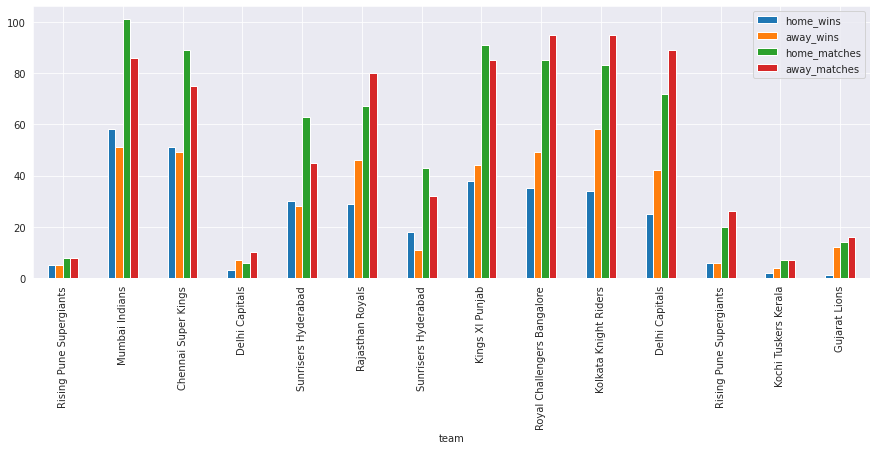

In [106]:
# Graphical representation of home wins and away wins for various teams with their respective home matches and away matches
teamwise_home_and_away_df.plot(x = 'team', y = ['home_wins','away_wins','home_matches','away_matches'], kind ='bar',width = 0.5,figsize=(15,5))



*   Mumbai Indians has the highest home matches and home wins
*   Royal Challangers Bangalore and Kolkata Knight Riders have approximately equal and the highest number of away matches, away wins higher in Kolkata Knight Riders



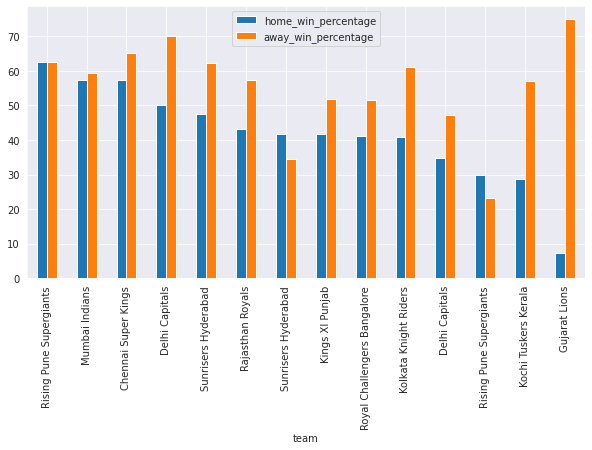

In [107]:
# Home win percentage and away win percentage for various teams
teamwise_home_and_away_df.plot(x = 'team', y = ['home_win_percentage','away_win_percentage'], kind ='bar',width = 0.5,figsize=(10,5))

 Gujarat Lions has more away win percentage and least home win, while Rising Pune Supergiant has maximum home wins and equally away wins. This data can help expect the outcome of a match depending on home or away match..